<a href="https://colab.research.google.com/github/Gabrielsandbox/Earth-Climate-Recon/blob/main/Sentinel_2_AQI_METEOSTAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

In [ ]:
def geocode(address):

   address = address.replace(' ', '+')

   url = 'https://geocode.maps.co/search?q=' + address
   response = requests.get(url)
   response_json = response.json()

   geocodes_df = pd.DataFrame(response_json)
   geocodes = ['','']
   geocodes[0] = geocodes_df['lat'][0]
   geocodes[1] = geocodes_df['lon'][0]

   return geocodes

In [ ]:
address = input('Target Region:')
geocodes = geocode(address)
print(geocodes[0])
print(geocodes[1])

Target Region:San Francisco
37.7790262
-122.419906


In [ ]:
#Meteostat

url = "https://meteostat.p.rapidapi.com/point/normals"

querystring = {"lat":geocodes[0],"lon":geocodes[1],"alt":"26","start":"1961","end":"1990"}

headers = {
	"X-RapidAPI-Key": "Your-RapidAPI-key",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

'''
Parameter	Description	Type
date	The date string (YYYY-MM-DD)	String
tavg	The average air temperature in °C	Float
tmin	The minimum air temperature in °C	Float
tmax	The maximum air temperature in °C	Float
prcp	The daily precipitation total in mm	Float
snow	The maximum snow depth in mm	Integer
wdir	The average wind direction in degrees (°)	Integer
wspd	The average wind speed in km/h	Float
wpgt	The peak wind gust in km/h	Float
pres	The average sea-level air pressure in hPa	Float
tsun	The daily sunshine total in minutes (m)	Integer
'''

{'meta': {'generated': '2023-11-27 04:09:07', 'stations': ['74506', '72493', '72494', '74509']}, 'data': [{'month': 1, 'tavg': 10.0, 'tmin': 6.9, 'tmax': 13.2, 'prcp': 96.1, 'wspd': 12.2, 'pres': 1020.6, 'tsun': None}, {'month': 2, 'tavg': 12.1, 'tmin': 8.7, 'tmax': 15.6, 'prcp': 69.0, 'wspd': 15.2, 'pres': 1019.5, 'tsun': None}, {'month': 3, 'tavg': 13.1, 'tmin': 9.5, 'tmax': 16.7, 'prcp': 69.1, 'wspd': 17.9, 'pres': 1018.3, 'tsun': None}, {'month': 4, 'tavg': 14.2, 'tmin': 10.1, 'tmax': 18.2, 'prcp': 31.4, 'wspd': 20.0, 'pres': 1017.7, 'tsun': None}, {'month': 5, 'tavg': 15.2, 'tmin': 11.1, 'tmax': 19.4, 'prcp': 5.4, 'wspd': 23.4, 'pres': 1016.0, 'tsun': None}, {'month': 6, 'tavg': 16.8, 'tmin': 12.5, 'tmax': 21.1, 'prcp': 3.4, 'wspd': 23.0, 'pres': 1015.0, 'tsun': None}, {'month': 7, 'tavg': 17.4, 'tmin': 13.0, 'tmax': 21.7, 'prcp': 1.5, 'wspd': 23.3, 'pres': 1015.0, 'tsun': None}, {'month': 8, 'tavg': 17.9, 'tmin': 13.7, 'tmax': 22.1, 'prcp': 1.3, 'wspd': 20.5, 'pres': 1014.8, 'tsu

'\nParameter\tDescription\tType\ndate\tThe date string (YYYY-MM-DD)\tString\ntavg\tThe average air temperature in °C\tFloat\ntmin\tThe minimum air temperature in °C\tFloat\ntmax\tThe maximum air temperature in °C\tFloat\nprcp\tThe daily precipitation total in mm\tFloat\nsnow\tThe maximum snow depth in mm\tInteger\nwdir\tThe average wind direction in degrees (°)\tInteger\nwspd\tThe average wind speed in km/h\tFloat\nwpgt\tThe peak wind gust in km/h\tFloat\npres\tThe average sea-level air pressure in hPa\tFloat\ntsun\tThe daily sunshine total in minutes (m)\tInteger\n'

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

def geocode(address):

   address = address.replace(' ', '+')

   url = 'https://geocode.maps.co/search?q=' + address
   response = requests.get(url)
   response_json = response.json()

   geocodes_df = pd.DataFrame(response_json)
   geocodes = ['','']
   geocodes[0] = geocodes_df['lat'][0]
   geocodes[1] = geocodes_df['lon'][0]

   return geocodes


def meteostat(geocodes):
  geocodes = geocodes
  url = "https://meteostat.p.rapidapi.com/point/normals"

  querystring = {"lat":geocodes[0],"lon":geocodes[1],"alt":"26","start":"1961","end":"1990"}

  headers = {
    "X-RapidAPI-Key": "Your-RapidAPI-key",
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
  }

  response = requests.get(url, headers=headers, params=querystring)

  return response.json()

def airqualityidx(geocodes):
  geocodes = geocodes
  url = 'https://api.waqi.info/feed/geo:' + geocodes[0] + ';' + geocodes[1] +'/?token=Your-AQI-token'

  response = requests.get(url)
  aqi_data_json = response.json()

  return aqi_data_json

#------------------ INIT

address = input('Target Region:')
geocodes = geocode(address)
geocodes_float = [0.0, 0.0]
geocodes_float[0] = float(geocodes[0])
geocodes_float[1] = float(geocodes[1])

print(geocodes[0])
print(geocodes[1])

meteostat_data = meteostat(geocodes)
print('Meteostat Data:\n')
print(meteostat_data)
print(' ')
print('Air Quality Index Data:\n')
airqualityidx_data = airqualityidx(geocodes)
print(airqualityidx_data)


#target date selection function
#Add more data sources
#Construct DataFrame based on data and plot

Target Region:Trier Germany
49.7596208
6.6441878
Meteostat Data:

{'meta': {'generated': '2023-11-27 18:24:33', 'stations': ['D5099', '10609', 'D1964', '10607']}, 'data': [{'month': 1, 'tavg': 2.4, 'tmin': 0.0, 'tmax': 4.7, 'prcp': 61.6, 'wspd': 14.5, 'pres': 1017.8, 'tsun': 1462}, {'month': 2, 'tavg': 3.6, 'tmin': 0.4, 'tmax': 6.7, 'prcp': 56.5, 'wspd': 13.8, 'pres': 1016.6, 'tsun': 3317}, {'month': 3, 'tavg': 6.6, 'tmin': 2.6, 'tmax': 10.7, 'prcp': 63.2, 'wspd': 14.2, 'pres': 1015.9, 'tsun': 5697}, {'month': 4, 'tavg': 10.0, 'tmin': 5.1, 'tmax': 14.9, 'prcp': 51.8, 'wspd': 12.7, 'pres': 1014.3, 'tsun': 8407}, {'month': 5, 'tavg': 14.2, 'tmin': 8.9, 'tmax': 19.5, 'prcp': 65.6, 'wspd': 11.6, 'pres': 1015.1, 'tsun': 9845}, {'month': 6, 'tavg': 17.4, 'tmin': 12.1, 'tmax': 22.6, 'prcp': 70.4, 'wspd': 10.5, 'pres': 1016.4, 'tsun': 10257}, {'month': 7, 'tavg': 19.2, 'tmin': 13.7, 'tmax': 24.7, 'prcp': 69.4, 'wspd': 10.1, 'pres': 1017.1, 'tsun': 10982}, {'month': 8, 'tavg': 18.8, 'tmin': 13.

In [ ]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

# Your client credentials
client_id = 'Your-Copernicus/Sentinel-2-client-id'
client_secret = 'Your-Copernicus/Sentinel-2-client-secret'

# Create a session
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)

# Get token for the session
token = oauth.fetch_token(token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
                          client_secret=client_secret)

# All requests using this session will have an access token automatically added

In [ ]:
def sentinelhub_compliance_hook(response):
    response.raise_for_status()
    return response

oauth.register_compliance_hook("access_token_response", sentinelhub_compliance_hook)

In [ ]:
#Sentinel Hub Process API

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
pip install sentinelhub

In [ ]:
import datetime
import os
import getpass

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    SHConfig,
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

In [ ]:
def plot_image(image, factor=1.0, clip_range=None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# Only run this cell if you have not created a configuration.

config = SHConfig()
config.sh_client_id = getpass.getpass("Enter your SentinelHub client id")
config.sh_client_secret = getpass.getpass("Enter your SentinelHub client secret")
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
config.save("cdse")

Enter your SentinelHub client id··········
Enter your SentinelHub client secret··········


In [ ]:
print(geocodes_float[0])
print(geocodes_float[1])
print(geocodes_float[0] + 1)
print(geocodes_float[1] + 1)

49.7596208
6.6441878
50.7596208
7.6441878


In [ ]:
betsiboka_coords_wgs84 = (geocodes_float[1], geocodes_float[0], (geocodes_float[1] + 1), (geocodes_float[0] + 1))

In [ ]:
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

Image shape at 60 m resolution: (1234, 1823) pixels


In [ ]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C.define_from(
                "s2l1c", service_url=config.sh_base_url
            ),
            time_interval=("2020-06-12", "2020-06-13"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

In [ ]:
true_color_imgs = request_true_color.get_data()

In [ ]:
print(
    f"Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}."
)
print(
    f"Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}"
)

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (1823, 1234, 3)


Image type: uint8


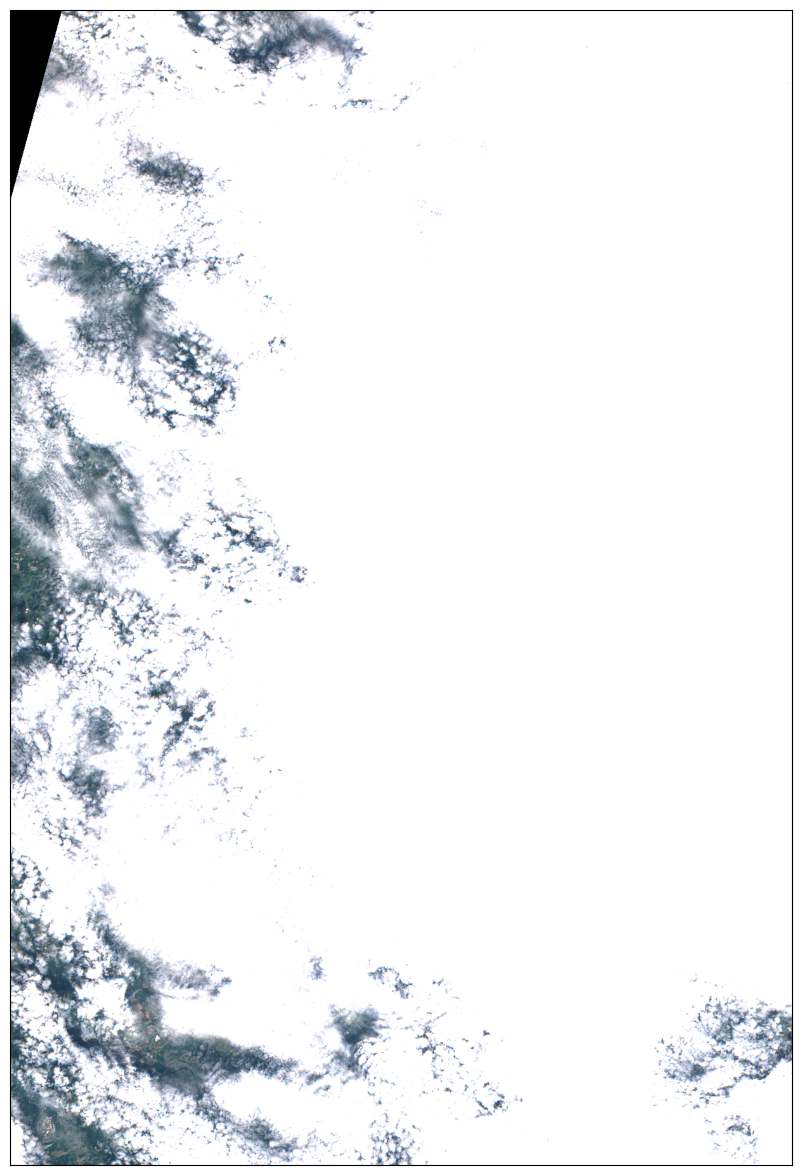

In [ ]:
image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

Target Region:Argentina
-34.9964963
-64.9672817
Meteostat Data:

{'meta': {'generated': '2023-11-27 18:34:08', 'stations': []}, 'data': []}
 
Air Quality Index Data:

{'status': 'ok', 'data': {'aqi': 42, 'idx': 419, 'attributions': [{'url': 'http://sinca.mma.gob.cl/', 'name': 'Sistema Nacional de Calidad del Aire en Chile', 'logo': 'Chile-SINCA.png'}, {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}], 'city': {'geo': [-34.162314609087, -70.713919225517], 'name': 'Rancagua I, Chile', 'url': 'https://aqicn.org/city/chile/rancagua-i', 'location': ''}, 'dominentpol': 'pm25', 'iaqi': {'co': {'v': 5.4}, 'dew': {'v': 12}, 'h': {'v': 56}, 'p': {'v': 1015}, 'pm10': {'v': 37}, 'pm25': {'v': 42}, 'so2': {'v': 1.5}, 't': {'v': 21}, 'w': {'v': 7.7}}, 'time': {'s': '2023-11-27 13:00:00', 'tz': '-03:00', 'v': 1701090000, 'iso': '2023-11-27T13:00:00-03:00'}, 'forecast': {'daily': {'o3': [{'avg': 10, 'day': '2023-11-25', 'max': 18, 'min': 2}, {'avg': 11, 'day': '2023-11-26', 'ma

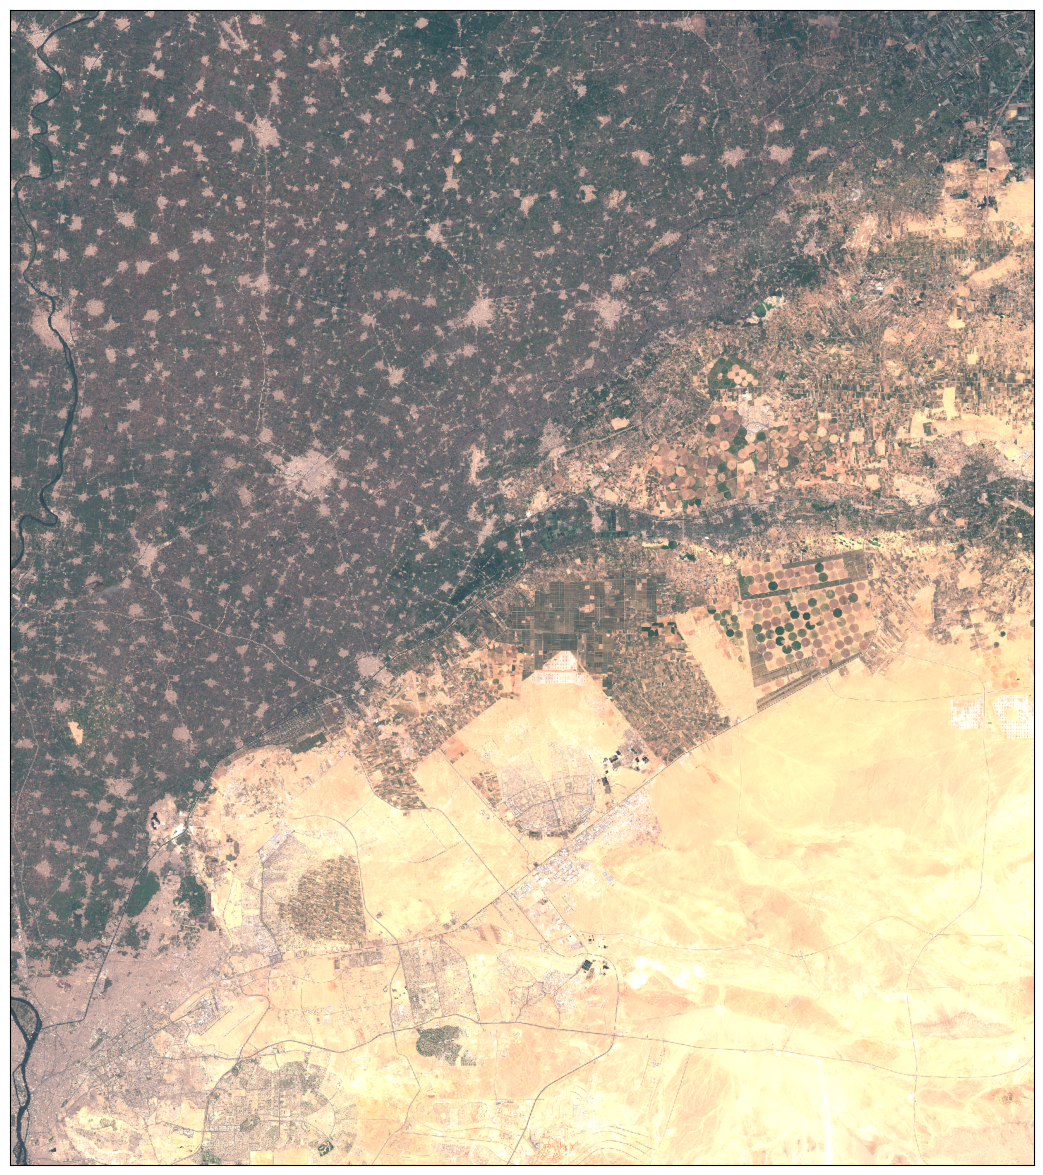

In [ ]:
#Code in full

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import requests
import json
import datetime
import os
import getpass
import matplotlib.pyplot as plt

from sentinelhub import (
    SHConfig,
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

# Your client credentials
client_id = 'Your-Copernicus/Sentinel-2-client-id'
client_secret = 'Your-Copernicus/Sentinel-2-client-secret'

# Create a session
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)

# Get token for the session
token = oauth.fetch_token(token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
                          client_secret=client_secret)

# All requests using this session will have an access token automatically added

def sentinelhub_compliance_hook(response):
    response.raise_for_status()
    return response

oauth.register_compliance_hook("access_token_response", sentinelhub_compliance_hook)



def geocode(address):

   address = address.replace(' ', '+')

   url = 'https://geocode.maps.co/search?q=' + address
   response = requests.get(url)
   response_json = response.json()

   geocodes_df = pd.DataFrame(response_json)
   geocodes = ['','']
   geocodes[0] = geocodes_df['lat'][0]
   geocodes[1] = geocodes_df['lon'][0]

   return geocodes


def meteostat(geocodes):
  geocodes = geocodes
  url = "https://meteostat.p.rapidapi.com/point/normals"

  querystring = {"lat":geocodes[0],"lon":geocodes[1],"alt":"26","start":"1961","end":"1990"}

  headers = {
    "X-RapidAPI-Key": "Your-RapidAPI-key",
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
  }

  response = requests.get(url, headers=headers, params=querystring)

  return response.json()

def airqualityidx(geocodes):
  geocodes = geocodes
  url = 'https://api.waqi.info/feed/geo:' + geocodes[0] + ';' + geocodes[1] +'/?token=Your-AQI-token'

  response = requests.get(url)
  aqi_data_json = response.json()

  return aqi_data_json


def plot_image(image, factor=1.0, clip_range=None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])


evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C.define_from(
                "s2l1c", service_url=config.sh_base_url
            ),
            time_interval=("2020-06-12", "2020-06-13"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

#------------------ INIT

address = input('Target Region:')
geocodes = geocode(address)
geocodes_float = [0.0, 0.0]
geocodes_float[0] = float(geocodes[0])
geocodes_float[1] = float(geocodes[1])

print(geocodes[0])
print(geocodes[1])

meteostat_data = meteostat(geocodes)
print('Meteostat Data:\n')
print(meteostat_data)
print(' ')
print('Air Quality Index Data:\n')
airqualityidx_data = airqualityidx(geocodes)
print(airqualityidx_data)

betsiboka_coords_wgs84 = (geocodes_float[1], geocodes_float[0], (geocodes_float[1] + 1), (geocodes_float[0] + 1))

resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

true_color_imgs = request_true_color.get_data()

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5 / 255, clip_range=(0, 1))